# Basic Code

In [20]:
str="Hello NIH"
print(str)

x=4
y=2*3
print(x, y)

Hello NIH
4 6


## A Tuple - ordered and unchangable

In [21]:
Fruits_tuple = ("apples", "bananas", "cantaloupes", "dates") #Create a tuple of fruits
print(Fruits_tuple)

('apples', 'bananas', 'cantaloupes', 'dates')


## Loop

In [22]:
# i = the number of times the code will loop within the range of (0,6)
fruit_list=['apples', 'bananas', 'cantaloupes', "dates"] #Loop for a list of fruits

for i in range(0,6): #python starts at "0" and stops just before the last interval "6"
    print(fruit_list)

['apples', 'bananas', 'cantaloupes', 'dates']
['apples', 'bananas', 'cantaloupes', 'dates']
['apples', 'bananas', 'cantaloupes', 'dates']
['apples', 'bananas', 'cantaloupes', 'dates']
['apples', 'bananas', 'cantaloupes', 'dates']
['apples', 'bananas', 'cantaloupes', 'dates']


### Another Loop

# i = the number of times the code will loop within the range of (0,6)
fruit_list=['apples', 'bananas', 'cantaloupes', "dates"] #Loop for a list of fruits

for i in range(0,1): #python starts at "0" and stops just before the last interval "1"
    print(fruit_list)

In [23]:
if x<y:  #If statement to evaluate values
  print(x, 'is less than', y)
else:
  print(x, 'is not less than', y)

4 is less than 6


⌛:#Variables

# One to Two Months of Focused Python Learning



##Module 4 - Functions, String Manipulation and Regular Expressions (Qualitative Categorization expressions) -- Joyce Thompson, NICHD



### Automated reports can be generated reflecting results from a data set that contains information about patients with or with out a diagnosis of cancer, and reported exposure to either smoking and glyphosate use.

In [24]:
#Importing packages and mounting drive
import pandas as pd
import numpy as np
import itertools

In [25]:
#Read-in dataset: removed first row
dataJT = pd.read_csv("TrimmedData_JT.csv")
dataJT.head()

,ID,LungCA,Gender,age,age_group,status,CigSmoke1,Cigarette_total,Glyphosate_use,Glyphosate_days
0,1.0,1,1,75,4,2,1,0,0,0
1,1.1,0,1,70,3,2,1,0,0,0
2,1.2,0,1,72,3,2,1,0,0,0
3,2.0,1,0,58,2,2,0,246375,0,0
4,2.1,0,0,55,2,2,1,0,1,160


In [26]:
#What category are the values in each column
print(dataJT.dtypes)

ID                 float64
LungCA               int64
Gender               int64
age                  int64
age_group            int64
status               int64
CigSmoke1            int64
Cigarette_total     object
Glyphosate_use       int64
Glyphosate_days      int64
dtype: object


A. Simple counts to categorize lung cancer cases



In [27]:
#Count number of patients with Lung cancer
df_LungCA = dataJT["LungCA"]==1
sum_LungCA = sum(df_LungCA)
print (sum_LungCA, "people have lung cancer")

233 people have lung cancer


In [28]:
#Count number of patients who don't have Lung cancer
df_noLungCA = dataJT["LungCA"]==0
sum_noLungCA = sum(df_noLungCA)
print (sum_noLungCA, "people do not have lung cancer")

447 people do not have lung cancer


In [29]:
#Slice data by lung cancer status
LungCA_positive = dataJT.loc[dataJT["LungCA"]==1]
LungCA_negative = dataJT.loc[dataJT["LungCA"]==0]

In [30]:
#Count within people with lung cancer using forward loop
n = ["Gender", "age_group", "CigSmoke1", "Glyphosate_use"]
m = ["males", "people younger than 55 years of age", " smokers", "glyphosphate users"]
for i,j in zip(n,m):
  print(sum(LungCA_positive[i] ==1), j, "have lung cancer")

135 males have lung cancer
34 people younger than 55 years of age have lung cancer
144  smokers have lung cancer
97 glyphosphate users have lung cancer


In [31]:
#Count the number of females, people older than 54, non-smokers, and non-glyphsphate user who have cancer.
n = ["Gender", "age_group", "CigSmoke1", "Glyphosate_use"]
m = ["females", "people older than 54 years of age", " non-smokers", "non-glyphosphate users"]
for i,j in zip(n,m):
  print(sum(LungCA_positive[i] !=1), j, "have lung cancer")

98 females have lung cancer
199 people older than 54 years of age have lung cancer
89  non-smokers have lung cancer
136 non-glyphosphate users have lung cancer


In [32]:
#Count within people with no lung cancer using forward loop
n = ["Gender", "age_group", "CigSmoke1", "Glyphosate_use"]
m = ["males", "people younger than 55 years of age", " smokers", "glyphosphate users"]
for i,j in zip(n,m):
  print(sum(LungCA_negative[i] ==1), j, "do not have lung cancer")

266 males do not have lung cancer
71 people younger than 55 years of age do not have lung cancer
298  smokers do not have lung cancer
184 glyphosphate users do not have lung cancer


In [33]:
n = ["Gender", "age_group", "CigSmoke1", "Glyphosate_use"]
m = ["females", "people older than 54 years of age", " non-smokers", "non-glyphosphate users"]
for i,j in zip(n,m):
  print(sum(LungCA_negative[i] !=1), j, "do not have lung cancer")

181 females do not have lung cancer
376 people older than 54 years of age do not have lung cancer
149  non-smokers do not have lung cancer
263 non-glyphosphate users do not have lung cancer


B. Is there equal representation within the different categories? Categorization using if-else statements

In [34]:
#Categorization of people with lung cancer using if-else statements
gender = LungCA_positive["Gender"]
age_group = LungCA_positive["age_group"]
smoker = LungCA_positive["CigSmoke1"]
glyco = LungCA_positive["Glyphosate_use"]


if sum(gender == 1) > sum(gender != 1):
  print("Cancer group has more males")
else:
    print ("Cancer group has more females")

if sum(smoker == 1) > sum(smoker != 1):
  print("Cancer group has more smokers")
else:
    print ("Cancer group has more non-smokers")

if sum(glyco == 1) > sum(glyco != 1):
  print("Cancer group has more glyphosphate-users")
else:
    print ("Cancer group has more glyphosphate-non-users")


#Categorization of people without lung cancer using if-else statements
gender = LungCA_negative["Gender"]
age_group = LungCA_negative["age_group"]
smoker = LungCA_negative["CigSmoke1"]
glyco = LungCA_negative["Glyphosate_use"]


if sum(gender == 1) > sum(gender != 1):
  print("Control group has more males")
else:
    print ("Control group has more females")

if sum(smoker == 1) > sum(smoker != 1):
  print("Control group has more smokers")
else:
    print ("Control group has more non-smokers")

if sum(glyco == 1) > sum(glyco != 1):
  print("Control group has more glyphosphate-users")
else:
    print ("Control group has more glyphosphate-non-users")

#Categorizing data based on age group
#In People with Lung cancer
age_grp1_JT = LungCA_positive["age_group"] == 1
age_grp2_JT = LungCA_positive["age_group"] == 2
age_grp3_JT = LungCA_positive["age_group"] == 3
age_grp4_JT = LungCA_positive["age_group"] == 4

if sum(age_grp1_JT) > sum(age_grp2_JT) and sum(age_grp1_JT) > sum(age_grp3_JT) and sum(age_grp1_JT) > sum(age_grp4_JT):
  print("Cancer group has more people younger than 55yrs")
elif sum(age_grp2_JT) > sum(age_grp1_JT) and sum(age_grp2_JT) > sum(age_grp3_JT) and sum(age_grp2_JT) > sum(age_grp4_JT):
  print("Cancer group has more people between age 55-64 yr")
elif sum(age_grp3_JT) > sum(age_grp1_JT) and sum(age_grp3_JT) > sum(age_grp2_JT) and sum(age_grp3_JT) > sum(age_grp4_JT):
  print("Cancer group has more people between age 65-74 yr")
elif sum(age_grp4_JT) > sum(age_grp1_JT) and sum(age_grp4_JT) > sum(age_grp2_JT) and sum(age_grp4_JT) > sum(age_grp3_JT):
  print("Cancer group has more people older than 75yrs")
else:
    print ("Some age-groups may have equal number of people with lung cancer")

#In People without Lung cancer
age_grp1_JT = LungCA_negative["age_group"] == 1
age_grp2_JT = LungCA_negative["age_group"] == 2
age_grp3_JT = LungCA_negative["age_group"] == 3
age_grp4_JT = LungCA_negative["age_group"] == 4

if sum(age_grp1_JT) > sum(age_grp2_JT) and sum(age_grp1_JT) > sum(age_grp3_JT) and sum(age_grp1_JT) > sum(age_grp4_JT):
  print("Control group has more people younger than 55yrs")
elif sum(age_grp2_JT) > sum(age_grp1_JT) and sum(age_grp2_JT) > sum(age_grp3_JT) and sum(age_grp2_JT) > sum(age_grp4_JT):
  print("Control group has more people between age 55-64 yr")
elif sum(age_grp3_JT) > sum(age_grp1_JT) and sum(age_grp3_JT) > sum(age_grp2_JT) and sum(age_grp3_JT) > sum(age_grp4_JT):
  print("Control group has more people between age 65-74 yr")
elif sum(age_grp4_JT) > sum(age_grp1_JT) and sum(age_grp4_JT) > sum(age_grp2_JT) and sum(age_grp4_JT) > sum(age_grp3_JT):
  print("Control group has more people older than 75yrs")
else:
    print ("Some age-groups may have equal number of people without lung cancer")

Cancer group has more males
Cancer group has more smokers
Cancer group has more glyphosphate-non-users
Control group has more males
Control group has more smokers
Control group has more glyphosphate-non-users
Some age-groups may have equal number of people with lung cancer
Control group has more people between age 65-74 yr


C. Violin plot to qualitatively represent dataset

Text(0.5, 1.0, 'Lung Cancer')

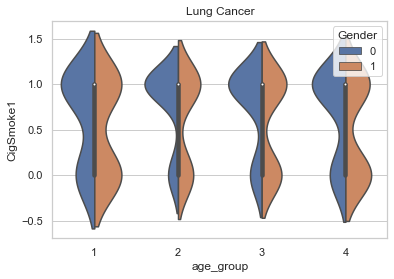

In [35]:
#showing lung cancer by gender using a violin plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
dataplot = LungCA_positive
ax = sns.violinplot(x=dataplot["age_group"], y=dataplot["CigSmoke1"], hue=dataplot["Gender"], split=True)
ax.set_title("Lung Cancer")


Text(0.5, 1.0, 'Control Group')

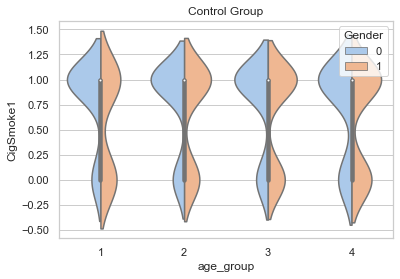

In [36]:
sns.set_theme(style="whitegrid")
dataplot2 = LungCA_negative
ax = sns.violinplot(x=dataplot2["age_group"], y=dataplot2["CigSmoke1"], hue=dataplot2["Gender"], split=True, palette=sns.color_palette('pastel'))
ax.set_title("Control Group")

In [37]:
#these libraries are already running in this file, so you don't need to rerun unless this is in a separate .ipynb file.
import pandas as pd #pandas library to perform math calculations and work with analytical apps
import seaborn as sb #seaborn library making graphics; builds on matploblib
##from google.colab import data_table



In [1]:
#the iris data set is built into Python
iris = pd.read_csv('IrisDataSet.csv')
iris.head() #list the first 5 rows of the Iris data set

NameError: name 'pd' is not defined

☝ #Data__<MyDrive/IrisDataSet>

In [4]:
#Iris stripplot
sb.stripplot(x = "species", y = "petal_length", data = iris)
plt.show()

NameError: name 'sb' is not defined

In [ ]:
# Draw a boxplot to show bills by day and time
sb.boxplot(x="species", y="petal_length", data=iris)
sb.despine(offset=10, trim=True)

In [ ]:
# Draw a nested boxplot to show bills by day and time
sb.histplot(x="species", y="petal_length", data=iris)
sb.despine(offset=10, trim=True)